In [ ]:
from tensorflow.keras.datasets import cifar10 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from skimage import color

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


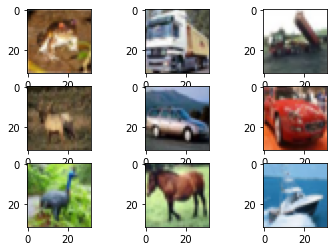

In [ ]:
for i in range (9):
    plt.subplot(330+i+1) # 3 hàng, 3 cột
    plt.imshow(x_train[i])
plt.show()


In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
#chuyen hinh anh ve mau gray 
x_train = color.rgb2gray(x_train)
y_train = color.rgb2gray(y_train)
x_test = color.rgb2gray(x_test)
y_test = color.rgb2gray(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


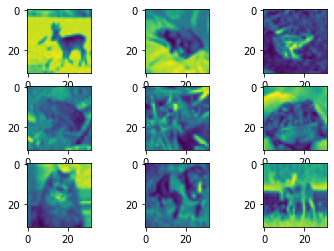

In [ ]:
for i in range (9):
    plt.subplot(330+i+1) # 3 hàng, 3 cột
    plt.imshow(x_train[20+i])
plt.show()

In [ ]:
x_train = x_train.reshape(50000,1024) 
x_test = x_test.reshape(10000,1024)
# Normalize inputs from 0-255 to 0-1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/= 255 
x_test/= 255

In [ ]:
x_train.shape

(50000, 1024)

In [ ]:
x_test.shape
x=x_test

In [ ]:
y_train = to_categorical(y_train,10) 
y_test = to_categorical(y_test,10)

In [ ]:
# Model ANN
model = Sequential()
model.add(Dense(512, activation ='relu', input_shape = (1024,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax')) # => Output
model.add(Dropout(0.1))

In [ ]:
model.summary()
model.compile( loss='categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy']) 
history = model.fit(x_train, y_train, batch_size = 128, epochs = 500, verbose = 1, validation_data = (x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
Total params: 792,586
Trainable params: 792,586
Non-trai

In [ ]:
model.save('finalcifar10.h5')
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss =',score[0])
print('Test accuracy =',score[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.9144 - accuracy: 0.4681
Test loss = 1.9144271612167358
Test accuracy = 0.46810001134872437


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


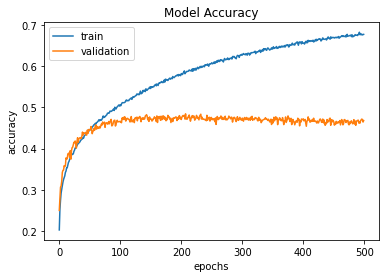

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
# Tạo một index và dự đoán 
random_index = np.random.choice(len(x_test))
x_sample = x_test[random_index]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_index]
y_sample_classes = y_predict[random_index]

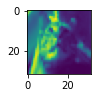

3


In [ ]:
import numpy as np
plt.subplot(330+1 )
plt.imshow(x_sample.reshape(32,32))
plt.show()
print(np.round(y_sample_true))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('BTVNcifar10.ipynb')

Mounted at /content/drive
--2022-05-12 19:38:19--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-12 19:38:20 (18.5 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/BTVNcifar10.ipynb to pdf
[NbConvertApp] Support files will be in BTVNcifar10_files/
[NbConvertApp] Making directory ./BTVNcifar10_files
[NbConvertApp] Making directory ./BTVNcifar10_files
[NbConvertApp] Making directory ./BTVNcifar10_files
[NbConvertApp] Making directory ./BTVNci

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'